In [ ]:
# Importing important libraries - pandas, numpy, seaborn and matplotlib - Proceeding with data exploration and processing which includes: (ONLY USE PIPELINE FOR REAL-LIFE DATA SHIT)

# spliting of data (x_train,x_test,y_train,y_test)
# searching for missing values - visualize them - remove them (or fill them with imputers)
# searching for duplicate value - remove them (most of the times)
# stats summary, dtypes, and other shits
# searching for outliers (visualise with hist and boxplot of all features) (if obvious errors remove them; if they're too much and affects results; analyse with and without condition then decide removing them)
# When you can't remove outliers -- try using transformations or other algorithms (not tree based)
# Visualizing categorical features, numerical features
# categorical values - using encoders

# EDA
# distribution of target feature
# use of heatmaps for corr matrix and pairplot for find corr relation
# Basic analysis of features their relation and observations - bivariate analysis (btw tow features)
# use of violinplot - for one constant feature vs other!

# feature engineering
# feature selection / Extraction (creation of less but new compressed features using dimensionality reduction)
# feature scaling -> categorial

# model training and evaluation and selection
# best model selection using hyper parameter tuning and evaluation

# Saving the best model

# Creating ML pipeline for new in real life data

# make predictions

# deployment

# documentation and reproducibility

# maintenance and retraining periodically


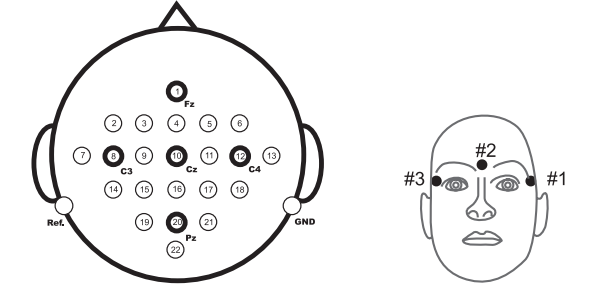

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving BCICIV_2a_all_patients.csv to BCICIV_2a_all_patients.csv


In [1]:
# Installing necessary libraries
!pip install numpy
!pip install xgboost
!pip install mne
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 42.2 MB/s eta 0:00:00


In [2]:
# Imports Libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import PowerTransformer
import io
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data Exploration
import io
df = pd.read_csv(io.BytesIO(uploaded['BCICIV_2a_all_patients.csv']), encoding='ISO-8859-1')
df.head()

NameError: name 'uploaded' is not defined

In [ ]:
# patient: Unique identifier for the subject whose EEG data was recorded.
# time: Timestamp indicating when the EEG sample was captured.
# label: Motor-imagery class assigned to the sample (e.g., left/right hand).
# epoch: Segment index grouping consecutive EEG samples into a trial.
# EEG-Fz: EEG signal from the frontal midline electrode (Fz).
# EEG-0: Auxiliary EEG channel 0 capturing electrical activity at its specific scalp location.
# EEG-1: Auxiliary EEG channel 1 capturing electrical activity at its specific scalp location.
# EEG-2: Auxiliary EEG channel 2 capturing electrical activity at its specific scalp location.
# EEG-3: Auxiliary EEG channel 3 capturing electrical activity at its specific scalp location.
# EEG-4: Auxiliary EEG channel 4 capturing electrical activity at its specific scalp location.
# EEG-5: Auxiliary EEG channel 5 capturing electrical activity at its specific scalp location.
# EEG-C3: EEG signal from the C3 electrode (left motor cortex).
# EEG-6: Auxiliary EEG channel 6 capturing electrical activity at its specific scalp location.
# EEG-Cz: EEG signal from the central midline electrode (Cz).
# EEG-7: Auxiliary EEG channel 7 capturing electrical activity at its specific scalp location.
# EEG-C4: EEG signal from the C4 electrode (right motor cortex).
# EEG-8: Auxiliary EEG channel 8 capturing electrical activity at its specific scalp location.
# EEG-9: Auxiliary EEG channel 9 capturing electrical activity at its specific scalp location.
# EEG-10: Auxiliary EEG channel 10 capturing electrical activity at its specific scalp location.
# EEG-11: Auxiliary EEG channel 11 capturing electrical activity at its specific scalp location.
# EEG-12: Auxiliary EEG channel 12 capturing electrical activity at its specific scalp location.
# EEG-13: Auxiliary EEG channel 13 capturing electrical activity at its specific scalp location.
# EEG-14: Auxiliary EEG channel 14 capturing electrical activity at its specific scalp location.
# EEG-Pz: EEG signal from the parietal midline electrode (Pz).
# EEG-15: Auxiliary EEG channel 15 capturing electrical activity at its specific scalp location.
# EEG-16: Auxiliary EEG channel 16 capturing electrical activity at its specific scalp location.

In [ ]:
df.dtypes
print("Missing values: ",df.isna().values.any()) # No missing values
print("Duplicated values: ",df.duplicated().any(), "\n") # No duplicated values
print(df.info())

In [ ]:
df.describe(include='number') # numerical features stats

In [ ]:
df.describe(include='object') # categorical features stats

In [ ]:
x = df.drop('label', axis=1)
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Visualizing the distribution of EEG features

fig, axes = plt.subplots(nrows=(len(df.columns.drop(['label', 'patient', 'time', 'epoch']))) // 5, ncols = 5, figsize=(20,18))
axes = axes.flatten()

for i, column in enumerate(df.columns.drop(['label', 'patient', 'time', 'epoch'])):

  sns.histplot(data=df, ax=axes[i], x=column, kde=True, palette='Set2')
  axes[i].set_title(f"{column} histplot")
  axes[i].grid(False)

plt.tight_layout()
plt.show()

In [ ]:
# Visualizing the metadata features
metadata_features = ['time', 'epoch', 'patient']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, column in enumerate(metadata_features):
  sns.histplot(data=df, x=column, palette='Set2', ax=axes[i], kde=False)
  axes[i].set_title(f"{column} hisplot")
  axes[i].grid(True)

In [ ]:
# All the EEG features are in normal distribution (maybe they're initially passed through standardization)
# There are no outliers in metadata (categorical features)
# Still we'll passed all the features through yeo-johnson transformation and standardization once!

In [ ]:
# Using yeo-johnson transformation
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

numerical_features = df.select_dtypes(include='number').columns

x_train_transformed = pd.DataFrame()
x_test_transformed = pd.DataFrame()

x_train_transformed[numerical_features] = pt.fit_transform(x_train[numerical_features])
x_test_transformed[numerical_features] = pt.transform(x_test[numerical_features])

# There aren't any categorical features in the dataFrame

In [ ]:
# Handling categorical values for target feature (label)
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

le = LabelEncoder()

y_train_transformed = le.fit_transform(y_train)
y_test_transformed = le.transform(y_test)



In [ ]:
# Exploratory Data Analysis (in depth analysis)
# Distribution of Target feature (label)
sns.countplot(data=df, x='label', palette='Set2')
plt.title("Distribution of labels")
plt.xlabel("label")
plt.ylabel("counts of labels")
plt.show()
plt.tight_layout()

In [ ]:
# Violin plot for other figures against labels
features_to_plot = df.columns.drop('label')
num_features = len(features_to_plot)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,18))
axes = axes.flatten()

for i, column in enumerate(features_to_plot):
  sns.violinplot(data=df, palette='Greens', y=column, ax=axes[i], hue=df['label'])

plt.tight_layout()
plt.show()

In [ ]:
# The violin plots show clear class-specific EEG patterns, especially around C3, Cz, and C4, where motor imagery activity is strongest. Tongue and foot signals are distinctly separated

In [ ]:
# Correlation matrix
corr_matrix = df[df.select_dtypes(include='number').columns].corr() # pearson correlation matrix

# Plotting heatmap of corr matrix
sns.heatmap(data=corr_matrix, cmap='viridis', fmt='.1f', cbar=True, linewidths='.5')




In [ ]:
# features are highly correlated, so it's better to check for multicollinearity!
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["feature"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])] # VIF in each feature
print(vif)

In [ ]:
# VIF score of EEG features are tending to infinity -> that was expected, now we have two option:
# -> To try using tree based or deep learning models
# -> To use dimensionality reduction technique (normally PCA used)

In [ ]:
# Feature Extraction
# We'll use CSP for dimensionality reduction while keeping only the most discriminative patterns
# !pip install mne
from mne.decoding import CSP
csp = CSP(n_components=3, reg=None, log=True, norm_trace=False)

# We'll use CSP transformed data only on LinearSVC, Logistic Regression
x_train_csp = csp.fit_transform(x_train_transformed, y_train_transformed)
x_test_csp = csp.transform(x_test_transformed)

# Creating an DataFrame
x_train_csp = pd.DataFrame(x_train_csp, columns=['CSP1', 'CSP2', 'CSP3'])
x_test_csp = pd.DataFrame(x_test_csp, columns=['CSP1', 'CSP2', 'CSP3'])




In [ ]:
# scatterplot to represent three CSP features (3d scatterplot)
import plotly.express as px

# Ensure y_train is aligned with x_train_csp for coloring
# Since x_train_csp was created with x_train.index, y_train should also be aligned.
# We use y_train directly for coloring.
fig = px.scatter_3d(x_train_csp, x='CSP1', y='CSP2', z='CSP3', opacity=0.7)

fig.show()

In [ ]:
# Kmeans clustering on CSP DATA

from sklearn.cluster import KMeans

# finding the K-Value using elbow method
wcss_list = []
for k in range(1, 11):
  kmeans = KMeans(init="k-means++", n_clusters=k)
  kmeans.fit(x_train_csp)
  wcss = kmeans.inertia_
  wcss_list.append(wcss)


# plotting WCSS vs K curve
plt.plot(range(1, 11), wcss_list)
plt.title("Elbow Method")
plt.xticks(range(1,11))
plt.xlabel("no.of Clusters")
plt.ylabel("WCSS")
plt.show()
plt.tight_layout()

In [ ]:
# Best value for K is
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(x_train_csp)
y_train_label = kmeans.labels_
y_test_label = kmeans.predict(x_test_csp)

# plotting the scatterrplot for after clustering on test_data
fig = px.scatter_3d(x_test_csp, x='CSP1', y='CSP2', z='CSP3', color=y_test_label)

fig.show()

In [ ]:
left_indices = np.where(y == 'left')[0] # indices of trials with having label as 'left'
sample_idx = left_indices[0]

# Extract patient, epoch, and label from the selected sample_idx
selected_patient = df.iloc[sample_idx]['patient']
selected_epoch = df.iloc[sample_idx]['epoch']
selected_label = df.iloc[sample_idx]['label']

# Filter the DataFrame to get all time points for the selected patient and epoch
epoch_data = df[(df['patient'] == selected_patient) & (df['epoch'] == selected_epoch)].copy()

# Get a list of only the EEG feature columns
eeg_columns_list = [col for col in df.columns if 'EEG' in col]

plt.figure(figsize=(15, 10))

# Plot each EEG channel's waveform over time for the selected epoch
for i, col_name in enumerate(eeg_columns_list):
    # Add a vertical offset for clarity between channels
    plt.plot(epoch_data['time'], epoch_data[col_name] + i * 10, label=f'Ch {col_name}')

# Set y-axis ticks and labels to correspond to the EEG channels
plt.yticks([i * 10 for i in range(len(eeg_columns_list))], eeg_columns_list)
plt.title(f'EEG Raw Signal Waveform for Patient {selected_patient}, Epoch {selected_epoch} (Label: {selected_label})')
plt.xlabel("Time (s)")
plt.ylabel("EEG Channels (Offset for clarity)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
frok sklearn.preprocessing import StandardScaler
left_indices = np.where(y == 'foot')[0] # indices of trials with having label as 'left'
sample_idx = left_indices[0]

# Standardizing the whole dataFrame for visualization

df_standardized = StandardScaler()


# Extract patient, epoch, and label from the selected sample_idx
selected_patient = df.iloc[sample_idx]['patient']
selected_epoch = df.iloc[sample_idx]['epoch']
selected_label = df.iloc[sample_idx]['label']

# Filter the DataFrame to get all time points for the selected patient and epoch
epoch_data = df[(df['patient'] == selected_patient) & (df['epoch'] == selected_epoch)].copy()

# Get a list of only the EEG feature columns
eeg_columns_list = [col for col in df.columns if 'EEG' in col]

plt.figure(figsize=(15, 10))

# Plot each EEG channel's waveform over time for the selected epoch
for i, col_name in enumerate(eeg_columns_list):
    # Add a vertical offset for clarity between channels
    plt.plot(epoch_data['time'], epoch_data[col_name] + i * 10, label=f'Ch {col_name}')

# Set y-axis ticks and labels to correspond to the EEG channels
plt.yticks([i * 10 for i in range(len(eeg_columns_list))], eeg_columns_list)
plt.title(f'EEG Raw Signal Waveform for Patient {selected_patient}, Epoch {selected_epoch} (Label: {selected_label})')
plt.xlabel("Time (s)")
plt.ylabel("EEG Channels (Offset for clarity)")
plt.grid(True)
plt.tight_layout()
plt.show()